In [1]:
#KNN

In [2]:
#https://www.kaggle.com/code/nagasai524/movie-review-sentiment-analysis-using-knn-and-bow

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
#Ignoring the warning that are obtained
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('IMDB Dataset.csv')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
#getting an over-view about all columns present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
#Total number of data records that have a null value in them
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
count=0
for i in df['review']:
    if count==5:
        break
    print(i)
    print()
    count+=1

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [8]:
#converting the sentiment column which of type object to integer to perform machine Learning algorithms
df['sentiment']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

In [9]:
#Finding out the composition of both positive and the negative reviews.
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [10]:
import regex as re
print(df['review'][1000])
re.sub('(<[\w\s]*/?>)',"",df['review'][1000])

This movie is awful, I can't even be bothered to write a review on this garbage! All i will say it is one of the most boring films I've ever seen.<br /><br />And the acting is very bad. The boy who plays the main character really annoys me, he's got the same expression on his face through out the movie. I just want to slap him! Basically 80% of the movie is slow motion shots of skateboarders, weird music, and utter sh*t..<br /><br />Apparently I've got to write at least 10 lines of text to submit this comment, so I'll use up a few more lines by saying the lead character has got one of those faces you just want to slap!<br /><br />Meh i give up..THIS MOVIE SUCKS !!!!


"This movie is awful, I can't even be bothered to write a review on this garbage! All i will say it is one of the most boring films I've ever seen.And the acting is very bad. The boy who plays the main character really annoys me, he's got the same expression on his face through out the movie. I just want to slap him! Basically 80% of the movie is slow motion shots of skateboarders, weird music, and utter sh*t..Apparently I've got to write at least 10 lines of text to submit this comment, so I'll use up a few more lines by saying the lead character has got one of those faces you just want to slap!Meh i give up..THIS MOVIE SUCKS !!!!"

In [11]:
!pip3 install contractions

In [12]:
import contractions
from tqdm import tqdm
#tqdm package is used to track the progress of work. It displays the percentage of loop done.

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not'
print('not' in stopwords)
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')
print('not' in stopwords)

True
False


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
processed_reviews=[]
for i in tqdm(df['review']):
    #Regular expression that removes all the html tags pressent in the reviews
    i=re.sub('(<[\w\s]*/?>)',"",i)
    #Expanding all the contractions present in the review to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    i=re.sub('\d+',"",i)
    #Making all the review text to be of lower case as well as remvoing the stopwords and words of length less than 3
    processed_reviews.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:20<00:00, 2385.25it/s]


In [15]:
#Creating a new datafram using the Processed Reviews
processed_df=pd.DataFrame({'review':processed_reviews,'sentiment':list(df['sentiment'])})

In [16]:
processed_df.head()

,review,sentiment
0,one reviewers mentioned watching episode hooke...,1
1,wonderful little production the filming techni...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter matteis love time money visually stunni...,1


In [17]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X=processed_df['review']
Y=processed_df['sentiment']

In [18]:
#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.33)
#when stratify is provided the splitting of data into train and test datasets agree with the composition of actual possitive and negative reviews present in the dataset

In [19]:
def print_shape(a,b):
    """
    Function that prints the shape of the numpy arrays passed as arguments
    """
    print("Size of Training Samples")
    print("="*30)
    print(a.shape)
    print("Size of Testing Samples")
    print("="*30)
    print(b.shape)
print_shape(x_train,x_test)

Size of Training Samples
(33500,)
Size of Testing Samples
(16500,)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer is used to implement BagOfWords techniqe using which the textual data can be converted to numerical data so that it can be used for computation.
vectorizer=CountVectorizer()
x_train_bow=vectorizer.fit_transform(x_train)
x_test_bow=vectorizer.transform(x_test)
print_shape(x_train_bow,x_test_bow)

Size of Training Samples
(33500, 166049)
Size of Testing Samples
(16500, 166049)


In [21]:
#The total number of features that are recognized by Count Vectorizer. In other words this also refers to total number of unique words present in the corpus.
len(list(vectorizer.get_feature_names()))

166049

In [22]:
#Displaying the first 100 features of BagofWords Vector
count=0
for i in list(vectorizer.get_feature_names()):
    if count==100:
        break
    print(i,end=",")
    count+=1

aaa,aaaaaaaargh,aaaaaaah,aaaaagh,aaaaargh,aaaaarrrrrrgggggghhhhhh,aaaaatchkah,aaaaaw,aaaand,aaaawwwwww,aaaggghhhhhhh,aaahhhhhhh,aaahthe,aaall,aaand,aaargh,aaarrrghi,aaaugh,aachen,aadha,aag,aage,aagh,aaghh,aah,aahed,aahemy,aahhhh,aahing,aailiyah,aaip,aaja,aajala,aak,aake,aaker,aakrosh,aaliyah,aaliyahs,aalox,aames,aamess,aamesthe,aamir,aamirs,aamirsalmanraveenakarishma,aan,aankh,aankhen,aap,aapke,aaran,aardman,aardmans,aardvark,aardvarks,aarf,aargh,aarghlet,aaron,aarona,aaronanchors,aaroncurb,aarons,aaronwho,aarp,aarrrgh,aasize,aasman,aatish,aau,aauugghh,aavjo,aawip,aback,abagail,abandon,abandoned,abandoning,abandoningindian,abandonment,abandonmentshe,abandonof,abandons,abanks,abas,abating,abattoirs,abba,abbas,abbasmustan,abbastyle,abbe,abbey,abbeythe,abbie,abbot,abbots,abbott,abbottok,

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params = { 'n_neighbors' : [40,50,60,70,80,90],
               'metric' : ['manhattan']}
knn=KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0,n_jobs=-1,verbose=1)
clf.fit(x_train_bow,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['manhattan'],
                                        'n_neighbors': [40, 50, 60, 70, 80,
                                                        90]},
                   random_state=0, verbose=1)

In [24]:
#The parameters of the best model
clf.best_params_

{'n_neighbors': 40, 'metric': 'manhattan'}

In [25]:
#The Score of the best model
clf.best_score_

nan

In [26]:
clf.cv_results_

{'mean_fit_time': array([0.04000764, 0.07230358, 0.11717997, 0.11609025, 1.96595559,
        0.04552345]),
 'std_fit_time': array([0.00712379, 0.01270202, 0.09914342, 0.06782095, 2.08340601,
        0.01449145]),
 'mean_score_time': array([2.36365823e+02, 2.13337388e+02, 1.36065521e+02, 9.10923983e+01,
        4.17612586e+01, 1.83396292e-01]),
 'std_score_time': array([5.86563306e+01, 5.72550063e+01, 1.17144571e+02, 1.11155177e+02,
        8.30522222e+01, 2.43482474e-02]),
 'param_n_neighbors': masked_array(data=[40, 50, 60, 70, 80, 90],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_metric': masked_array(data=['manhattan', 'manhattan', 'manhattan', 'manhattan',
                    'manhattan', 'manhattan'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 40, 'metric': 'manhattan'},
  {'n_neighbors': 50, 'metric': 'ma

In [27]:
from sklearn.metrics import roc_curve, auc
train_fpr,train_tpr,thresholds=roc_curve(y_train,clf.predict_proba(x_train_bow)[:,1])
test_fpr,test_tpr,thresholds=roc_curve(y_test,clf.predict_proba(x_test_bow)[:,1])

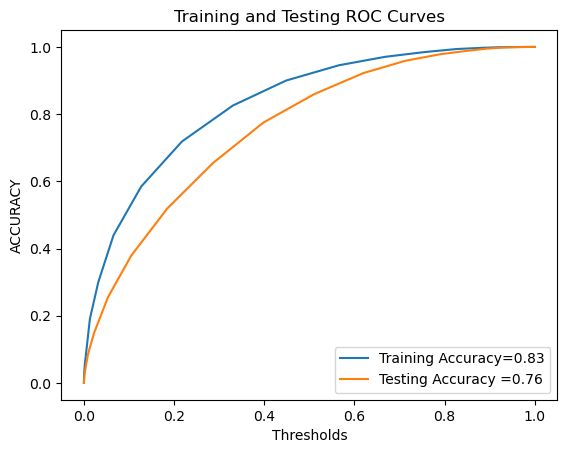

In [28]:
import matplotlib.pyplot as plt
plt.plot(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("ACCURACY")
plt.title("Training and Testing ROC Curves")
plt.show()

<AxesSubplot:>

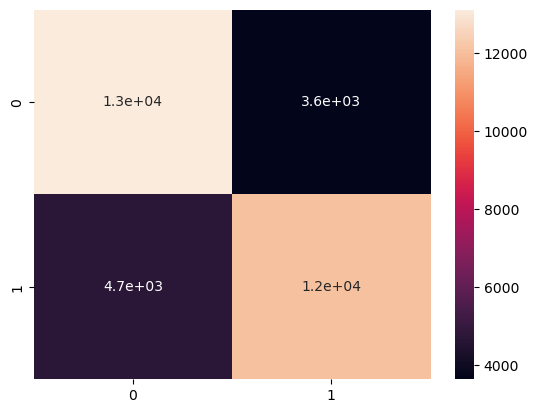

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train_bow)),annot=True)

<AxesSubplot:>

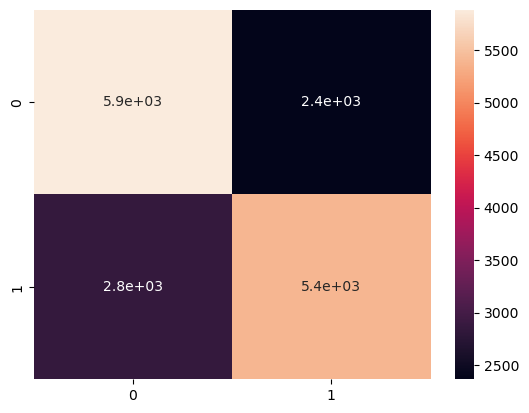

In [30]:
sns.heatmap(confusion_matrix(y_test,clf.predict(x_test_bow)),annot=True)

In [1]:
#naive bayes
#Dataset Details - https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
#https://www.kaggle.com/code/syedjaferk/imdb-sentiment-classification-using-naive-bayes

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  50000
Number of columns:  2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [8]:
from bs4 import BeautifulSoup
cleantext = BeautifulSoup(data["review"][1], 'lxml').text
cleantext

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [9]:
import re
cleantext = re.sub(r'[^\w\s]', '', cleantext)
cleantext

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [10]:
import nltk
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
token = cleantext.lower().split()
stopword = set(stopwords.words('english'))
token_list = [ word for word in token if word.lower() not in stopword ]

In [13]:
" ".join(token_list)

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [14]:
from nltk.stem import WordNetLemmatizer

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\FAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
lemmatizer.lemmatize(" ".join(token_list))

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [19]:
data.keys()

Index(['review', 'sentiment'], dtype='object')

In [21]:
from tqdm import tqdm
def data_cleaner(data):
    clean_data = []
    for review in tqdm(data):
        cleantext = BeautifulSoup(review, "lxml").text
        cleantext = re.sub(r'[^\w\s]', '', cleantext)
        cleantext = [ token for token in cleantext.lower().split() if token not in stopword ]
        cleantext = lemmatizer.lemmatize(" ".join(cleantext))
        clean_data.append(cleantext.strip())
    return clean_data

In [22]:
clean_data = data_cleaner(data.review.values)

  2%|█▏                                                                          | 807/50000 [00:00<00:13, 3641.09it/s]C:\Users\FAHAD\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3761.93it/s]


In [23]:
clean_data[0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data.sentiment, test_size=0.2, random_state=42, stratify=data.sentiment)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 2) (40000,)
(10000, 2) (10000,)


In [27]:
clean_data_train_data = data_cleaner(X_train.review.values)

  2%|█▎                                                                          | 721/40000 [00:00<00:10, 3616.10it/s]C:\Users\FAHAD\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [00:10<00:00, 3782.16it/s]


In [28]:
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

,review,sentiment,cleaned_text
47808,I caught this little gem totally by accident b...,positive,caught little gem totally accident back 1980 8...
20154,I can't believe that I let myself into this mo...,negative,cant believe let movie accomplish favor friend...
43069,*spoiler alert!* it just gets to me the nerve ...,negative,spoiler alert gets nerve people remake use ter...
19413,If there's one thing I've learnt from watching...,negative,theres one thing ive learnt watching george ro...
13673,"I remember when this was in theaters, reviews ...",negative,remember theaters reviews said horrible well d...


In [29]:
clean_data_test_data = data_cleaner(X_test.review.values)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\Users\FAHAD\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3731.49it/s]


,review,sentiment,cleaned_text
18870,"Yes, MTV there really is a way to market Daria...",negative,yes mtv really way market daria started clever...
39791,The story of the bride fair is an amusing and ...,negative,story bride fair amusing engaging one filmmake...
30381,"A team varied between Scully and Mulder, two o...",positive,team varied scully mulder two scientists pilot...
42294,This was a popular movie probably because of t...,negative,popular movie probably humor fastmoving story ...
33480,This movie made me so angry!! Here I am thinki...,negative,movie made angry thinking heres new horror mov...


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vec = CountVectorizer()
vec = vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [32]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(40000, 192139)
(10000, 192139)


In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [34]:
classifier = MultinomialNB()

In [35]:
alpha_ranges = {
    "alpha": [0.001, 0.01, 0.1, 1, 10.0, 100]
}

In [36]:
grid_search = GridSearchCV(classifier, param_grid=alpha_ranges, scoring='accuracy', cv=3, return_train_score=True)
grid_search.fit(train_x_bow, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10.0, 100]},
             return_train_score=True, scoring='accuracy')

In [37]:
alpha = [0.001, 0.01, 0.1, 1, 10.0, 100]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']

test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

In [38]:
import matplotlib.pyplot as plt

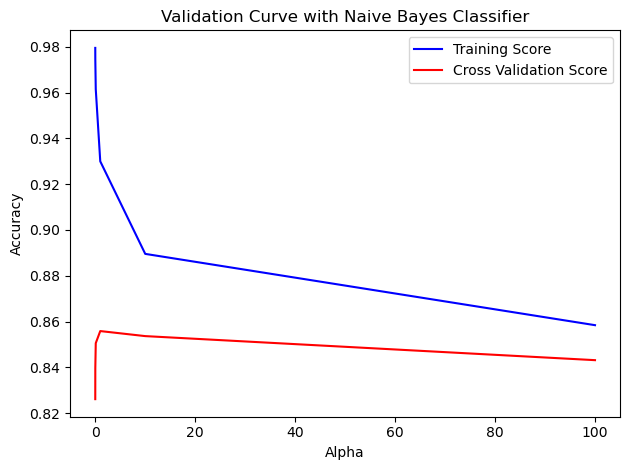

In [39]:
plt.plot(alpha, train_acc, label="Training Score", color='b')
plt.plot(alpha, test_acc, label="Cross Validation Score", color='r')

plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [40]:
grid_search.best_estimator_

MultinomialNB(alpha=1)

In [41]:
classifier = MultinomialNB(alpha=1)
classifier.fit(train_x_bow, y_train)

MultinomialNB(alpha=1)

In [42]:
predict = classifier.predict(test_x_bow)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test, predict))

Accuracy is  0.8599


In [44]:
from sklearn.metrics import classification_report
print("Accuracy is ", classification_report(y_test, predict))

Accuracy is                precision    recall  f1-score   support

           0       0.85      0.88      0.86      5000
           1       0.87      0.84      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [45]:
text = ["I liked the movie. It was great"]
text_vec = vec.transform(text)
classifier.predict(text_vec)

array([1])

In [46]:
le.inverse_transform([1])

array(['positive'], dtype=object)

In [47]:
text = ["Movie was worse"]
text_vec = vec.transform(text)
classifier.predict(text_vec)

array([0])

In [48]:
le.inverse_transform([0])

array(['negative'], dtype=object)

In [49]:
from joblib import dump
dump(vec, 'vectors.joblib')
dump(classifier, 'classifier.joblib')

['classifier.joblib']